Date : 15/12/2023

# Assignment - 6

## Q1. Classification report - Chatbot_data

In [1]:
### -------------------
### Importing libraries
### -------------------


import pandas as pd
import numpy as np
import string


from sklearn.linear_model import LogisticRegression
from sklearn.
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report


from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

### Global variable

In [2]:
TRAIN_SIZE = 0.7

RANDOM_STATE = 42

In [3]:
# Reading the csv file through pandas

chatbot_df = pd.read_csv('chatbot_data_nlp.csv')

In [4]:
chatbot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   response_id    80 non-null     object 
 1   class          80 non-null     object 
 2   response_text  80 non-null     object 
 3   Unnamed: 3     2 non-null      object 
 4   Unnamed: 4     0 non-null      float64
 5   Unnamed: 5     1 non-null      object 
 6   Unnamed: 6     0 non-null      float64
 7   Unnamed: 7     1 non-null      object 
dtypes: float64(2), object(6)
memory usage: 5.1+ KB


In [5]:
chatbot_df

,response_id,class,response_text,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,response_1,not_flagged,I try and avoid this sort of conflict,NaN,NaN,NaN,NaN,NaN
1,response_2,flagged,Had a friend open up to me about his mental ad...,NaN,NaN,NaN,NaN,NaN
2,response_3,flagged,I saved a girl from suicide once. She was goin...,NaN,NaN,NaN,NaN,NaN
3,response_4,not_flagged,i cant think of one really...i think i may hav...,NaN,NaN,NaN,NaN,NaN
4,response_5,not_flagged,Only really one friend who doesn't fit into th...,,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
75,response_76,not_flagged,"Now that I've been through it, although i'm no...",NaN,NaN,NaN,NaN,NaN
76,response_77,flagged,when my best friends mom past away from od'ing...,NaN,NaN,NaN,NaN,NaN
77,response_78,not_flagged,As a camp counselor I provide stability in kid...,NaN,NaN,NaN,NaN,NaN
78,response_79,flagged,My now girlfriend used to have serious addicti...,NaN,NaN,NaN,NaN,NaN


In [6]:
chatbot_df['Unnamed: 3'].unique()

chatbot_df['Unnamed: 4'].unique()

chatbot_df['Unnamed: 5'].unique()

chatbot_df['Unnamed: 6'].unique()

chatbot_df['Unnamed: 7'].unique()

array([nan, ' '], dtype=object)

In [7]:
chatbot_df.drop(['Unnamed: 7','Unnamed: 6','Unnamed: 5','Unnamed: 4','Unnamed: 3','response_id'],
                axis=1, 
                inplace = True)

In [8]:
# Initializing the parameters

stop = stopwords.words('english')

wnl = WordNetLemmatizer()

In [9]:
# tokenizing the words

def clean_document(document):
    
    word_token = word_tokenize(document)

    token1 = [word.lower() for word in word_token if word.isalpha() or word.isdigit()]

    token2 = [word for word in token1 if word not in stop]
    
    token3 = []
    
    tags = pos_tag(token2)
    
    for word1 in tags:
        
        if word1[1].startswith('N'):
            
            token3.append(wnl.lemmatize(word1[0],pos='n'))
            
        if word1[1].startswith('V'):
            
            token3.append(wnl.lemmatize(word1[0],pos='v'))
            
        if word1[1].startswith('R'):
            
            token3.append(wnl.lemmatize(word1[0],pos='r'))
            
        if word1[1].startswith('J'):
            
            token3.append(wnl.lemmatize(word1[0],pos='a'))
    
    return token3

In [10]:
chatbot_df['response_text'].apply(lambda x : clean_document(x))

chatbot_df

,class,response_text
0,not_flagged,I try and avoid this sort of conflict
1,flagged,Had a friend open up to me about his mental ad...
2,flagged,I saved a girl from suicide once. She was goin...
3,not_flagged,i cant think of one really...i think i may hav...
4,not_flagged,Only really one friend who doesn't fit into th...
...,...,...
75,not_flagged,"Now that I've been through it, although i'm no..."
76,flagged,when my best friends mom past away from od'ing...
77,not_flagged,As a camp counselor I provide stability in kid...
78,flagged,My now girlfriend used to have serious addicti...


In [11]:
tfidf = TfidfVectorizer(analyzer=clean_document)

x_vect = tfidf.fit_transform(chatbot_df['response_text'])

y = chatbot_df['class']

## Build model

In [12]:
# initializing the estimator

lr = LogisticRegression()

In [13]:
# Splitting the data into train and test set

X_train, X_test, y_train, y_test = train_test_split(x_vect, y, 
                                                    train_size = TRAIN_SIZE,
                                                    stratify = y,
                                                    random_state  = RANDOM_STATE)

In [14]:
X_train.shape, X_test.shape

((56, 447), (24, 447))

In [15]:
lr.fit(X_train, y_train)

LogisticRegression()

In [16]:
# Prediction 

y_pred = lr.predict(X_test)

y_pred

array(['not_flagged', 'not_flagged', 'not_flagged', 'not_flagged',
       'not_flagged', 'not_flagged', 'not_flagged', 'not_flagged',
       'not_flagged', 'not_flagged', 'not_flagged', 'not_flagged',
       'not_flagged', 'not_flagged', 'not_flagged', 'not_flagged',
       'not_flagged', 'not_flagged', 'not_flagged', 'not_flagged',
       'not_flagged', 'not_flagged', 'not_flagged', 'not_flagged'],
      dtype=object)

## Performance evaluation

In [17]:
# Accuracy score

print('Accuracy score :', np.round(accuracy_score(y_test,y_pred),2))

Accuracy score : 0.67


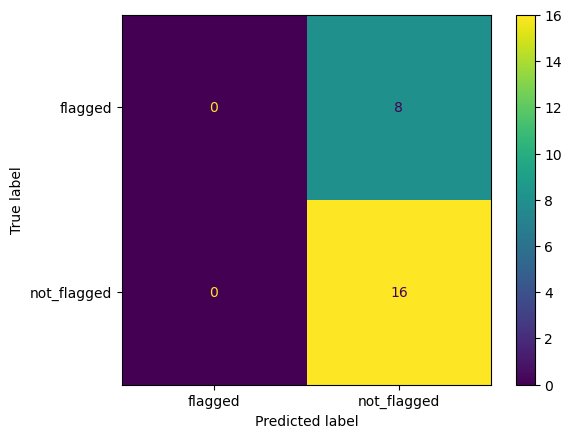

In [18]:
# Displaying confusion matrix

ConfusionMatrixDisplay.from_predictions(y_test,y_pred);

In [19]:
# Classification report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     flagged       0.00      0.00      0.00         8
 not_flagged       0.67      1.00      0.80        16

    accuracy                           0.67        24
   macro avg       0.33      0.50      0.40        24
weighted avg       0.44      0.67      0.53        24



/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Q2. Classification report - ecommerce Dataset

In [20]:
# Reading the CSV file

ecom_df = pd.read_csv('ecommerceDatasetNLP.csv', header = None, names = ['label', 'feature'])

ecom_df

,label,feature
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...
...,...,...
50420,Electronics,Strontium MicroSD Class 10 8GB Memory Card (Bl...
50421,Electronics,CrossBeats Wave Waterproof Bluetooth Wireless ...
50422,Electronics,Karbonn Titanium Wind W4 (White) Karbonn Titan...
50423,Electronics,"Samsung Guru FM Plus (SM-B110E/D, Black) Colou..."


In [21]:
# tokenizing the words

def clean_document_ecom(document):
    
    if isinstance(document, float):
        
        document = str(document)
    
    word_token = word_tokenize(document)

    token1 = [word.lower() for word in word_token if word.isalpha() or word.isdigit()]

    token2 = [word for word in token1 if word not in stop]
    
    token3 = []
    
    tags = pos_tag(token2)
    
    for word1 in tags:
        
        if word1[1].startswith('N'):
            
            token3.append(wnl.lemmatize(word1[0], pos = 'n'))
            
        if word1[1].startswith('V'):
            
            token3.append(wnl.lemmatize(word1[0], pos = 'v'))
            
        if word1[1].startswith('R'):
            
            token3.append(wnl.lemmatize(word1[0], pos = 'r'))
            
        if word1[1].startswith('J'):
            
            token3.append(wnl.lemmatize(word1[0], pos = 'a'))
    
    return token3

In [22]:
ecom_df['feature'].apply(lambda x : clean_document_ecom(x))

ecom_df

,label,feature
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...
...,...,...
50420,Electronics,Strontium MicroSD Class 10 8GB Memory Card (Bl...
50421,Electronics,CrossBeats Wave Waterproof Bluetooth Wireless ...
50422,Electronics,Karbonn Titanium Wind W4 (White) Karbonn Titan...
50423,Electronics,"Samsung Guru FM Plus (SM-B110E/D, Black) Colou..."


In [25]:
ecom_df.dropna(inplace = True)

In [26]:
tfidf = TfidfVectorizer(analyzer=clean_document)

x_vect = tfidf.fit_transform(ecom_df['feature'])

y = ecom_df['label']

## Build model

In [28]:
# initializing the Logistic regression for multiclass classification

lr_multiclass = LogisticRegression(multi_class = 'ovr')

In [29]:
X_train, X_test, y_train, y_test = train_test_split(x_vect, y,
                                                   train_size = TRAIN_SIZE,
                                                   stratify = y,
                                                   random_state = RANDOM_STATE)

In [30]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((35296, 53309), (15128, 53309), (35296,), (15128,))

In [31]:
# Fitting the model

lr_multiclass.fit(X_train, y_train)

LogisticRegression(multi_class='ovr')

In [32]:
# prediction

y_pred = lr_multiclass.predict(X_test)

## Performace evaluation

In [33]:
# accuracy score

print('Accuracy score :', np.round(accuracy_score(y_test,y_pred),2))

Accuracy score : 0.96


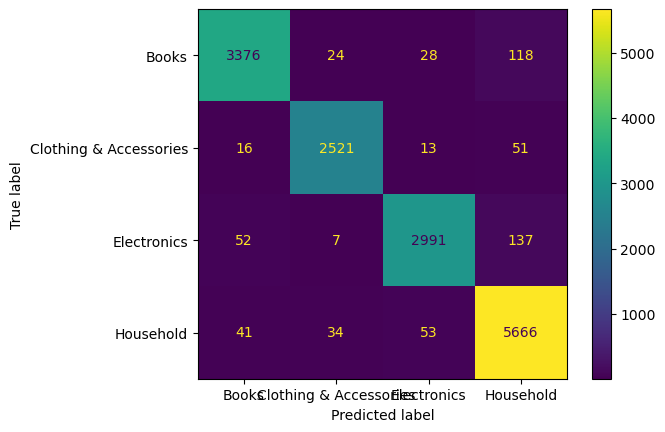

In [34]:
# Displaying confusion matrix

ConfusionMatrixDisplay.from_predictions(y_test,y_pred);

In [35]:
# Classification report

print(classification_report(y_test,y_pred))

                        precision    recall  f1-score   support

                 Books       0.97      0.95      0.96      3546
Clothing & Accessories       0.97      0.97      0.97      2601
           Electronics       0.97      0.94      0.95      3187
             Household       0.95      0.98      0.96      5794

              accuracy                           0.96     15128
             macro avg       0.97      0.96      0.96     15128
          weighted avg       0.96      0.96      0.96     15128

